***Identify a deafault client (CREDIT SCORING)***

<img src = 'https://www.nationalvanguard.org/wp-content/uploads/2016/03/debt-slave.jpg' width='400px' >

<a id="sec1"></a>
# [Description](#sec1)

Enter text here

<a id="sec1.1"></a>
## [Features Defination](sec1.1)

client_id -  client ID

education - the level of education

sex - borrowe's gender

age - borrowers age

car - has(has no) car

car_type - flag of car type

decline_app_cnt - number of rejected past applications

good_work - good job flag

bki_request_cnt - number of requests to Credit bureau

home_address - home address categorizer 

work_address - work address categorizer 

income - borrower's income

foreign_passport - has (has no) traveling passport

sna - Relationships of borrower with the bank's clients

first_time - how old the information about the borrower was

score_bki - score based on data from Credit bureau

region_rating - region rating

app_date - application date

default - has (has no) default

<a id="sec2"></a>
# [INDEX](#sec2)
1. [Description](#sec1)
    * [1.1 Features Defination](#sec1.1)
2. [INDEX](#sec2)
3. [IMPORT LIBRARRIES](#sec3)
4. [Load and Chek the Dataset](#sec4)
5. [Visualization](#sec5)
    * [5.1 Correclation](#sec5.1)
    * [Significance of continuous variables ](#sec5.2)
6. [Categorical Vars](#sec6)

<a id="sec3"></a>
# [IMPORT LIBRARRIES](sec3)

In [1]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from jupyterthemes import jtplot

jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [ ]:
# fix the version of the packages so that the experiments are reproducible:
#!pip freeze > requirements.txt

In [ ]:
# Lock a RANDOM SEED to keep experiments reproducible.
RANDOM_SEED = 5

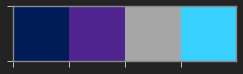

In [2]:
colors = ['#001c57', '#50248f', '#a6a6a6', '#38d1ff']
sns.palplot(sns.color_palette(colors))

<a id="sec4"></a>
# [Load and Chek the Dataset](#sec4)

In [23]:
df_train = pd.read_csv(
    r'C:\Users\wangshu202040\The A-Team\sf-dst-scoring\train.csv')
df_test = pd.read_csv(
    r'C:\Users\wangshu202040\The A-Team\sf-dst-scoring\test.csv')
submission = pd.read_csv(
    r'C:\Users\wangshu202040\The A-Team\sf-dst-scoring\sample_submission.csv')

In [24]:
# For the correct processing of features, combine train and test sets into a one dataset

df_train['sample'] = 1  # train
df_test['sample'] = 0  # test
# as we have to predict rating, in test set we just fill it with 0
df_test['default'] = 0

df = df_test.append(df_train, sort=False).reset_index(
    drop=True)  # combine sets

In [25]:
display(df.sample(3))
df.info()

client_id   app_date education sex  age car car_type  decline_app_cnt  \
69443      99463  16APR2014       SCH   F   42   N        N                0   
20395      10267  17JAN2014       SCH   M   24   N        N                1   
41558      55925  04MAR2014       GRD   M   28   N        N                1   

       good_work  score_bki  bki_request_cnt  region_rating  home_address  \
69443          0  -1.848043                1             70             2   
20395          0  -1.323771                2             50             1   
41558          0  -1.323936                4             60             1   

       work_address  income  sna  first_time foreign_passport  sample  default  
69443             3   15000    4           1                N       1        0  
20395             2   20000    1           3                N       0        0  
41558             1   40000    1           3                N       1        0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110148 entries, 0 to 110147
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   client_id         110148 non-null  int64  
 1   app_date          110148 non-null  object 
 2   education         109670 non-null  object 
 3   sex               110148 non-null  object 
 4   age               110148 non-null  int64  
 5   car               110148 non-null  object 
 6   car_type          110148 non-null  object 
 7   decline_app_cnt   110148 non-null  int64  
 8   good_work         110148 non-null  int64  
 9   score_bki         110148 non-null  float64
 10  bki_request_cnt   110148 non-null  int64  
 11  region_rating     110148 non-null  int64  
 12  home_address      110148 non-null  int64  
 13  work_address      110148 non-null  int64  
 14  income            110148 non-null  int64  
 15  sna               110148 non-null  int64  
 16  first_time        11

<a id="sec4.1"></a>
# [Data Types](#sec4.1)

In [26]:
dtype_df = df.dtypes.reset_index()
dtype_df.columns = ['Count', 'Column Type']
dtype_df.groupby('Column Type').agg('count').reset_index()

Column Type  Count
0       int64     13
1     float64      1
2      object      6

In [27]:
for i, j in enumerate(df.columns):
    print(j, type(df.loc[1][i]))

client_id <class 'numpy.int64'>
app_date <class 'str'>
education <class 'str'>
sex <class 'str'>
age <class 'numpy.int64'>
car <class 'str'>
car_type <class 'str'>
decline_app_cnt <class 'numpy.int64'>
good_work <class 'numpy.int64'>
score_bki <class 'numpy.float64'>
bki_request_cnt <class 'numpy.int64'>
region_rating <class 'numpy.int64'>
home_address <class 'numpy.int64'>
work_address <class 'numpy.int64'>
income <class 'numpy.int64'>
sna <class 'numpy.int64'>
first_time <class 'numpy.int64'>
foreign_passport <class 'str'>
sample <class 'numpy.int64'>
default <class 'numpy.int64'>


<a id="sec4.2"></a>
# [Missing Values](#sec4.2)

Let's observe an empty data (Ignore for now, USE PANDAS_PROFILING)

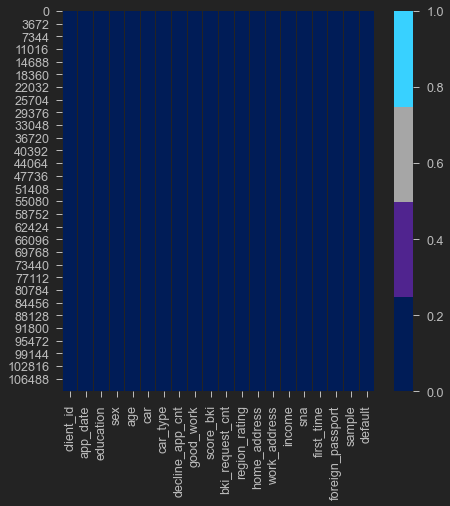

client_id - 0.0%
app_date - 0.0%
education - 0.4%
sex - 0.0%
age - 0.0%
car - 0.0%
car_type - 0.0%
decline_app_cnt - 0.0%
good_work - 0.0%
score_bki - 0.0%
bki_request_cnt - 0.0%
region_rating - 0.0%
home_address - 0.0%
work_address - 0.0%
income - 0.0%
sna - 0.0%
first_time - 0.0%
foreign_passport - 0.0%
sample - 0.0%
default - 0.0%


In [15]:
# # Plot missing values
# cols = df.columns
# fig, ax = plt.subplots(figsize=(7, 7))
# sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colors))
# plt.show()

# # Show in percents
# for col in df.columns:
#     pct_missing = np.mean(df[col].isnull())
#     print(f'{col} - {round(pct_missing,3)*100}%')

Let's fill missing values

In [17]:
# edu_name = df['education'].value_counts().index.to_list(
# )  # Получаем список значений
# edu_distr = df['education'].value_counts(
#     normalize=True).values  # Получаем список вероятностей
# missing = df['education'].isnull()  # Флаги с наличием пропусков
# df.loc[missing, ['education']] = np.random.choice(
#     edu_name, size=len(df[missing]), p=edu_distr
# )  # Подставляем значения из списка имен в соответствии в вероятностью встречи имени

<a id="sec4"></a>
# [Functions and Classes](#sec4)

In [38]:
def pandas_report(data):
    ''' Function is called for generating of dataset profile-report'''

    profile = data.profile_report(
        title='Credit Scoring',
        progress_bar=False,
        correlations={
            'pearson': {'calculate': True}
        },
        interactions={
            'continuous': True,
            'targets': []
        },
        missing_diagrams={
            'heatmap': True,
            'dendrogram': True,
            'matrix': True
        },
        vars={
            'cat' : {'n_obs':10}
        }
    )
    
    return profile

In [39]:
data_profile = pandas_report(df)
data_profile.to_file('result.html') # Check your folder

 - Dataset has 19 features (excluding feature ''Sample)
 
 - Total Number Of observations is 110 148
 
 - Missing values is about 0.04%
 
 - There is no duplicates
 
 - ***Client_id*** has 100% unique values 
 
 - ***app_date*** has only 120 distinct values (0.1%). Most of presented dates concentrated in MARCH2014, APRIL2014, FEB2014. We need to process this column in further
 
 - ***education*** Consists 5 distinct categories: 
     
 - - SCH (52%) - School;
 - - GRD (31%) - Graduated (Master degree);
 - - UGR (13%) - UnderGraduated (Bachelor degree);
 - - PGR (1.7%) - PostGraduated;
 - - ACD (0.3%) - Academic Degree;
 - - Missing (0.4%)
 
 We will see how it is impact on a result and probably generate new feature 'Has/Has No Hi-degree education'
 
 - ***sex*** Consists 2 distinct categories:
 - - Female (56%);
 - - Male (44%);
 
 - ***age*** Is a real Number variable. The distribution is a left-shifted.
 
 -- Minimum	21
 
 -- median	37
 
 -- Mean	39.2
 
 -- Maximum	72
 
 -- Interquartile range (IQR)	18
 
 
 
 
 
 
 
 
 

<a id="sec5"></a>
# [Visualization](#sec5)

Ler's check how our target variable distributed

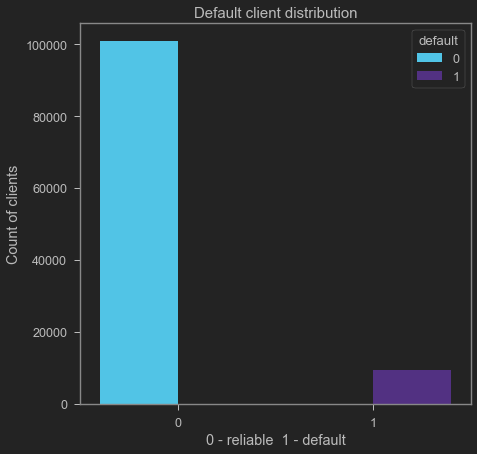

In [19]:
plt.figure(figsize=(7, 7))
sns.countplot(x='default',
              hue='default',
              data=df,
              color=colors[1],
              palette=[colors[3], colors[1]])
plt.title('Default client distribution', fontsize=15)
plt.xlabel('0 - reliable  1 - default')
plt.ylabel('Count of clients')
plt.show()

We may see that our data is not balanced. We have more clients who pay back their loan, which is logically correct. 

However, we need to take care about it in the future model evaluation.

Chek missing data

In [ ]:
df.isnull().sum()

Let's fix missing data

In [ ]:
df['education'] = df['education'].fillna(
    df['education'].value_counts().index[0])

Create lists with depicted types of data

In [21]:
bin_cols = ['sex','car','car_type','good_work','foreign_passport']
cat_cols = ['education','home_address','work_address']
num_cols = ['age','decline_app_cnt','income','bki_request_cnt']

Check the distrinution of numeric columns

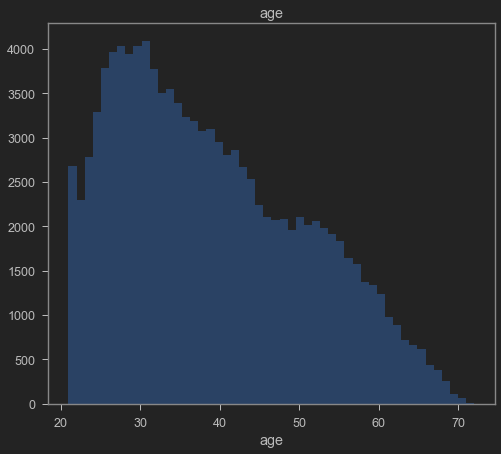

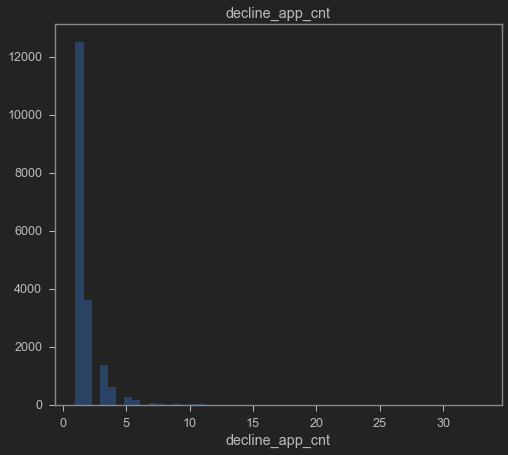

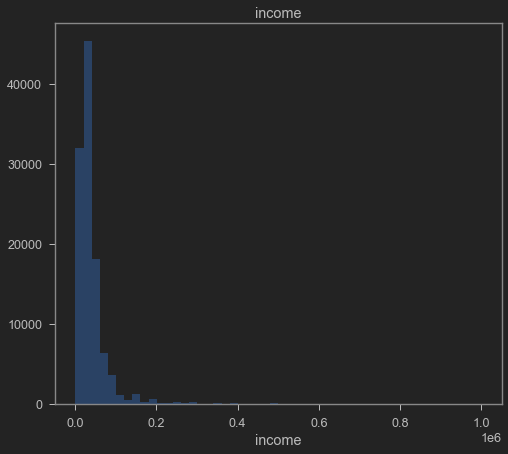

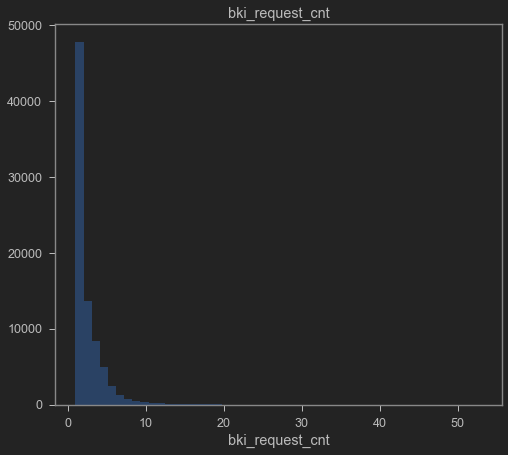

In [22]:
for i in num_cols:
    plt.figure()
    sns.distplot(df[i][df[i] > 0].dropna(), kde = False, rug=False)
    plt.title(i)
    plt.show()

BLA BLA

In [ ]:
df1 = df.copy()
for col in num_cols:
    df1[col] = df[col].apply(lambda x: np.log(x+1))

In [ ]:
for i in num_cols:
    plt.figure(figsize=(20, 3))
    plt.subplot(121)
    sns.distplot(df1[i].values, bins=20, color=colors[1])
    plt.title('variable distribution\n' + i, fontsize=15)
    plt.xlabel(i)
    plt.ylabel('Quantity (frequency)')

    plt.subplot(122)
    sns.boxplot(x = 'default',y = i,data=df1)
    plt.title('variable distribution\n' + i, fontsize=15)
    plt.xlabel(i)

<a id="sec5.1"></a>
## [Correclation](#sec5.1)

In [ ]:
sns.heatmap(df[num_cols].corr().abs(),vmin=0,vmax=1,annot=True,square=True)

<a id="sec5.2"></a>
## [Significance of continuous variables ](#sec5.2)

В основе метода оценки значимости переменных лежит однофакторный дисперсионный анализ (ANOVA). Основу процедуры составляет обобщение результатов двух выборочных t-тестов для независимых выборок (2-sample t). 

В качестве меры значимости мы будем использовать значение f-статистики. Чем значение статистики выше, тем меньше вероятность того, что средние значения не отличаются, и тем важнее данный признак для нашей линейной модели

In [ ]:
from sklearn.feature_selection import f_classif

In [ ]:
imp_num = pd.Series(f_classif(df[num_cols], df['default'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

<a id="sec6"></a>
# [Categorical Vars](#sec6)

Самый простой способ — отобразить каждое значение категории в уникальное число. Например, в поле sex значение sex = female преобразовать в , а sex = male — в . Эту простую операцию приходится делать достаточно часто, поэтому в модуле sklearn.preprocessing именно для этой задачи реализован класс LabelEncoder.

Метод fit этого класса находит все уникальные значения и строит таблицу для соответствия каждой категории некоторому числу, а метод transform непосредственно преобразует значения в числа. После fit у label_encoder будет доступно поле classes_, содержащее все уникальные значения. Можно их пронумеровать и убедиться, что преобразование выполнено верно.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
mapped_education = pd.Series(label_encoder.fit_transform(df['sex']))
print(dict(enumerate(label_encoder.classes_)))

Сработало! Теперь всегда можно обратиться к classes_ , если забыли, что закодировали. Применим LabelEncoder ко всему набору бинарных переменных.

In [ ]:
# Для бинарных признаков мы будем использовать LabelEncoder

label_encoder = LabelEncoder()

for column in bin_cols:
    df[column] = label_encoder.fit_transform(df[column])
    
# убедимся в преобразовании    
df.head()

In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
df2 = df.copy()

In [ ]:
for column in cat_cols:
    df2[column] = label_encoder.fit_transform(df[column])
    
# убедимся в преобразовании    
df2.head()

In [ ]:
imp_cat = pd.Series(mutual_info_classif(df2[bin_cols + cat_cols], df2['default'],
                                     discrete_features =True), index = bin_cols + cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

# Подготовка данных к машинному обучению

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
X_cat = OneHotEncoder(sparse = False).fit_transform(df[cat_cols].values)

In [ ]:
X_cat.shape

In [ ]:
from sklearn.preprocessing import StandardScaler
# Стандартизация числовых переменных

X_num = StandardScaler().fit_transform(df[num_cols].values)

In [ ]:
# Объединяем

X = np.hstack([X_num, df[bin_cols].values, X_cat])
Y = df['default'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, roc_curve, roc_auc_score

In [ ]:
probs = classifier.predict_proba(X_test)
probs = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
f1 = f1_score(y_test,y_pred)
print(f1)

In [ ]:
y_pred.sum()

In [ ]:
y_test.sum()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Добавим типы регуляризации
penalty = ['l1', 'l2']

# Зададим ограничения для параметра регуляризации
C = np.logspace(0, 4, 10)

# Создадим гиперпараметры
hyperparameters = dict(C=C, penalty=penalty)

model = LogisticRegression()
model.fit(X_train, y_train)

# Создаем сетку поиска с использованием 5-кратной перекрестной проверки
clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

# View best hyperparameters
print('Лучшее Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Лучшее C:', best_model.best_estimator_.get_params()['C'])

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=100000)
model.fit(X_train,y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
f1 = f1_score(y_test,y_pred)
print(f1)

In [ ]:
probs = classifier.predict_proba(X_test)
probs = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()